##**Assignment 2**
##Image features Detection and Matching
##Image Classification
####*Submitted by:* 
>> **_Usama Aleem Shami_**

>> _Reg. No. : **329894**_

>> _MSCS 2020_

####*Submitted to:* 
>> **_Dr. Muhammad Moazam Fraz_**

>> _Computer Vision (CS-867)_



In [197]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Task1: Image Feature Extraction and Matching

In [2]:
print(cv.__version__)

4.1.2


In [3]:
pip install opencv-contrib-python==3.4.1.15

     |████████████████████████████████| 30.3MB 150kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
#Importing my Helper Script Code from my Google Drive
%run "drive/My Drive/Asg2Helper.py"
print(cv.__version__)

3.4.1


In [4]:
# Location of my Images on My Google Drive
image_path1 = "drive/My Drive/Images2/Set1"
image_path2 = "drive/My Drive/Images2/Set2"
image_path3 = "drive/My Drive/Images2/Set3"
image_type = ".jpg"

#Reading *.jpg files from Dataset (by custom function)
imgSet1 = loadImage(image_path1,image_type)
print ("Total", image_type, "files in folder1 are", len(imgSet1))

imgSet2 = loadImage(image_path2,image_type)
print ("Total", image_type, "files in folder2 are", len(imgSet2))

imgSet3 = loadImage(image_path3,image_type)
print ("Total", image_type, "files in folder3 are", len(imgSet3))

Total .jpg files in folder1 are 2
Total .jpg files in folder2 are 2
Total .jpg files in folder3 are 3


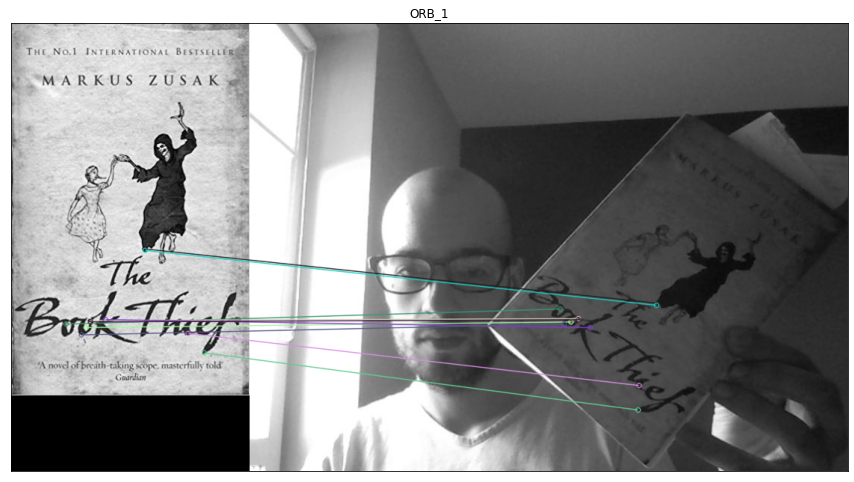

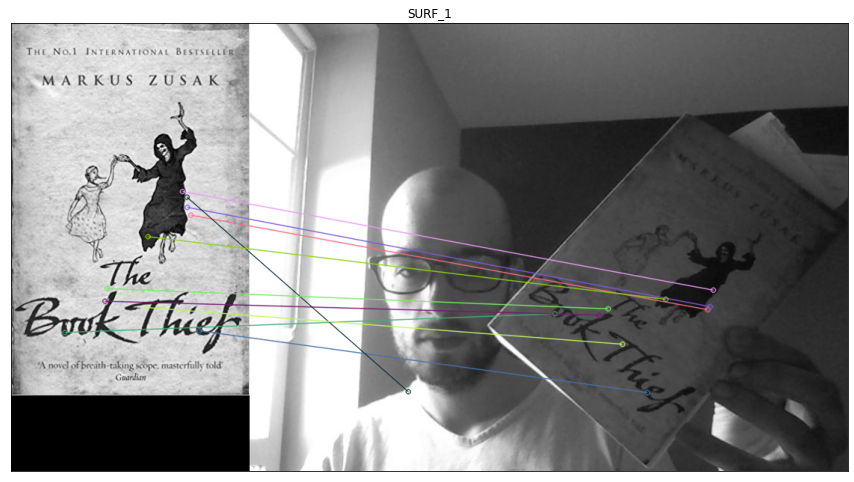

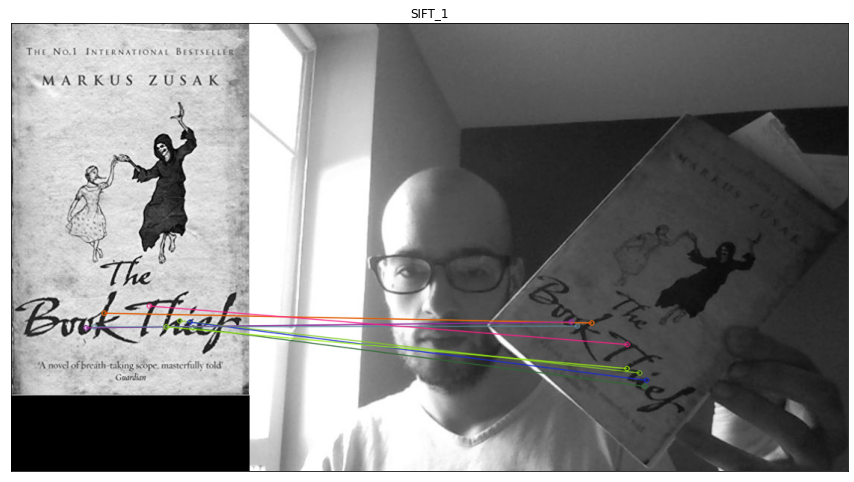

In [ ]:
img1 = cv.imread(imgSet1[0],0)      # Set1_Image1
img2 = cv.imread(imgSet1[1],0)      # Set1_Image2

orb = computeORBnMatch(img1,img2,10)
compareImage(orb,"ORB_1",15,30)

surf = computeSURFnMatch(img1,img2,10)
compareImage(surf,"SURF_1",15,30)

sift = computeSIFTnMatch(img1,img2,10)
compareImage(sift,"SIFT_1",15,30)

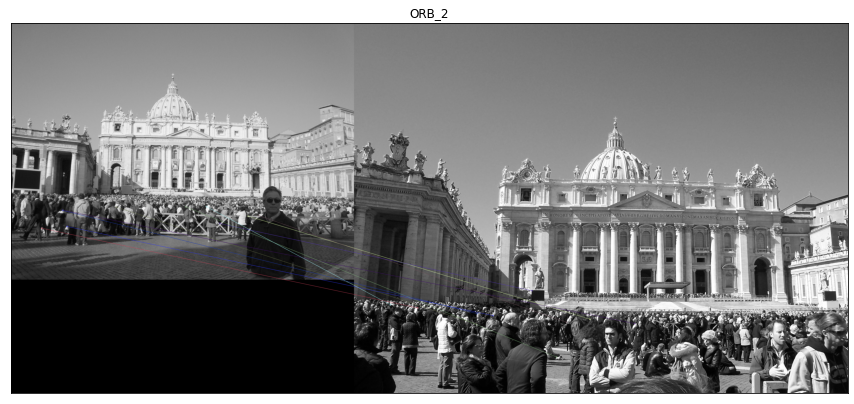

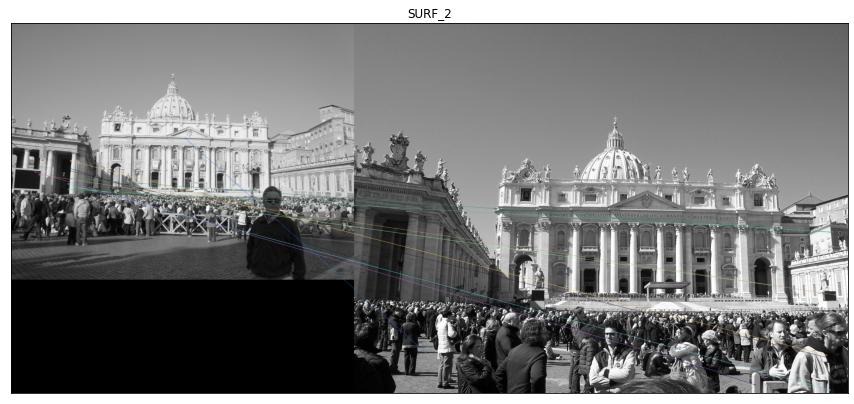

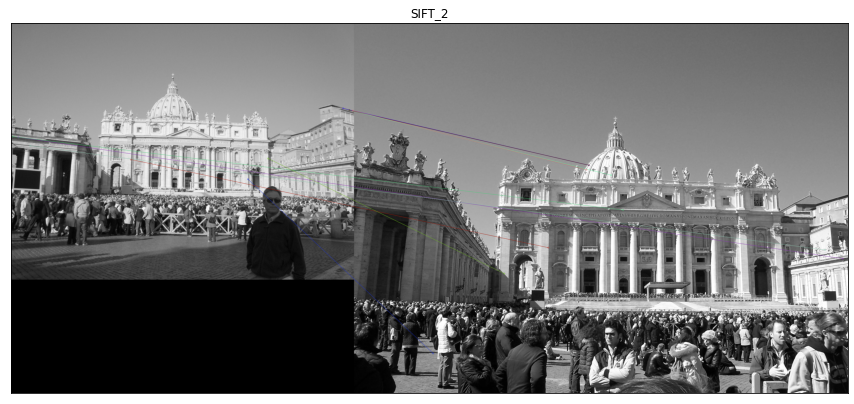

In [ ]:
img1 = cv.imread(imgSet2[0],0)      # Set2_Image1
img2 = cv.imread(imgSet2[1],0)      # Set2_Image2

orb = computeORBnMatch(img1,img2,10)
compareImage(orb,"ORB_2",15,30)

surf = computeSURFnMatch(img1,img2,10)
compareImage(surf,"SURF_2",15,30)

sift = computeSIFTnMatch(img1,img2,10)
compareImage(sift,"SIFT_2",15,30)

ORB applied and Features Matched


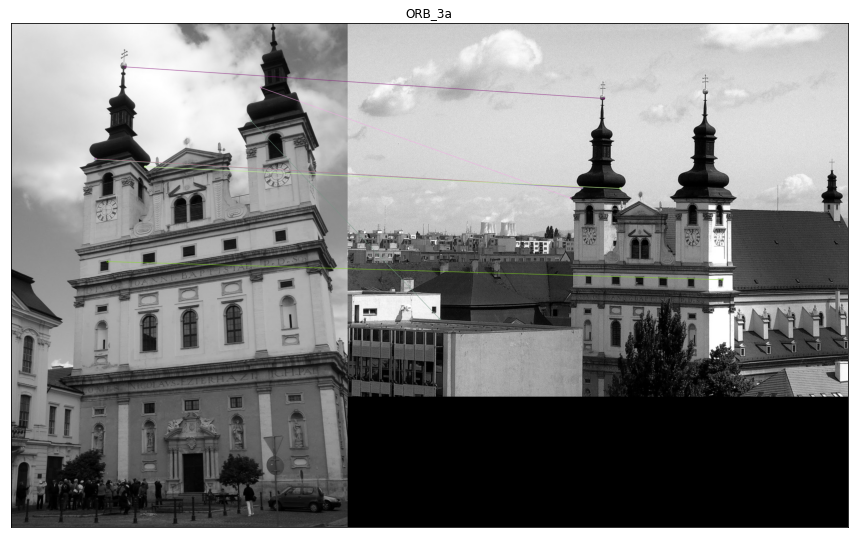

SURF applied and Features Matched


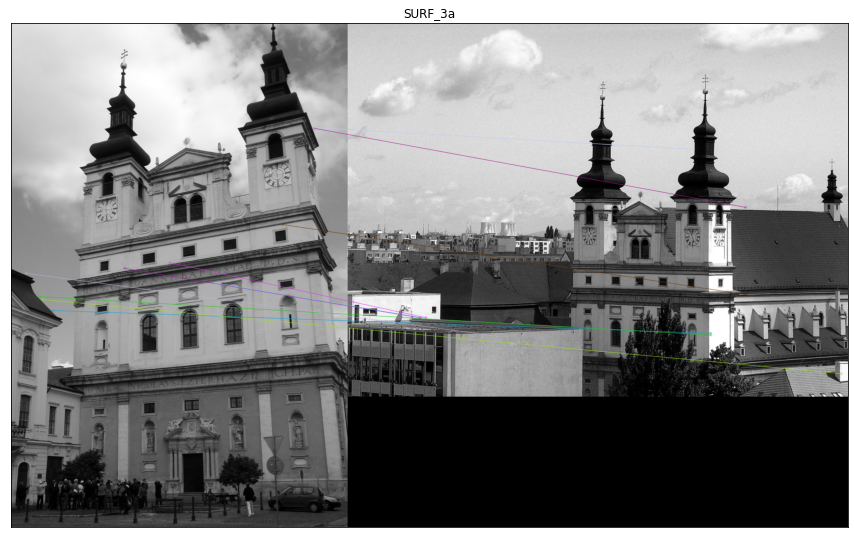

SIFT applied and Features Matched


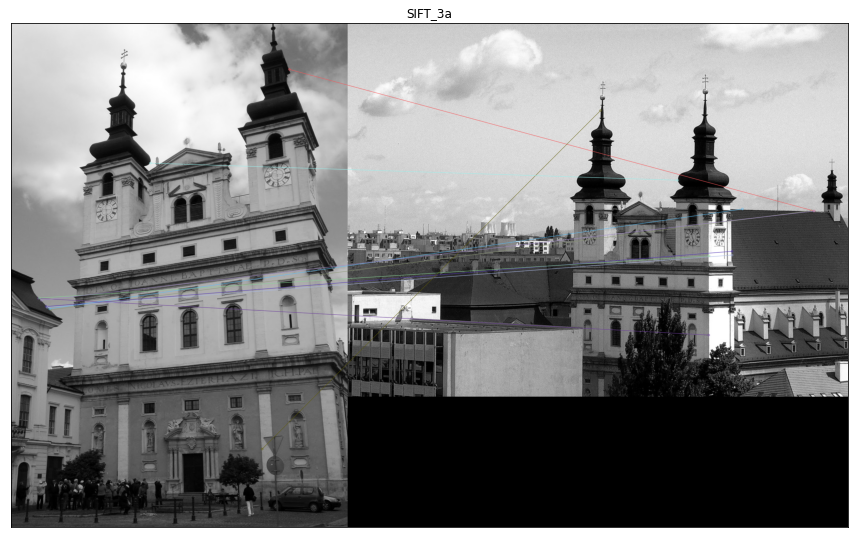

ORB applied and Features Matched


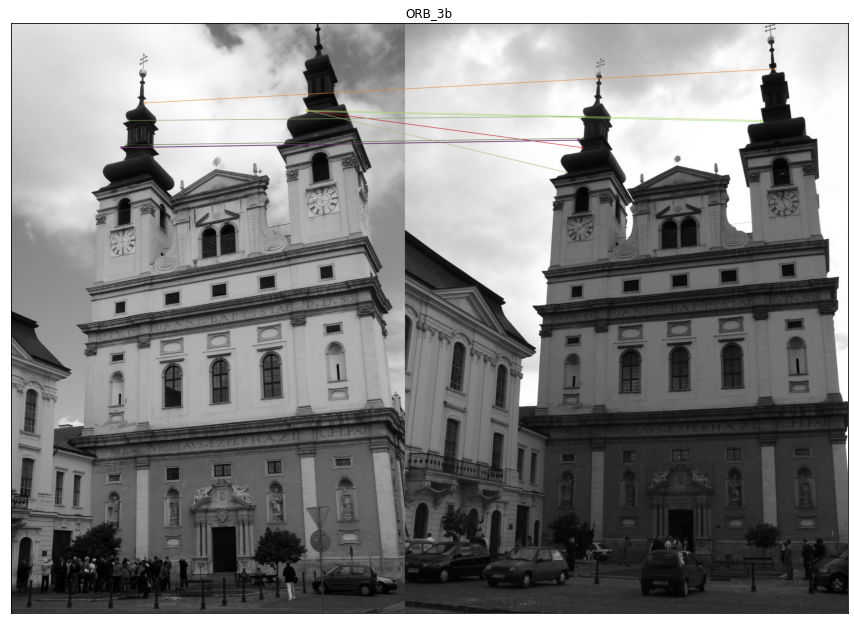

SURF applied and Features Matched


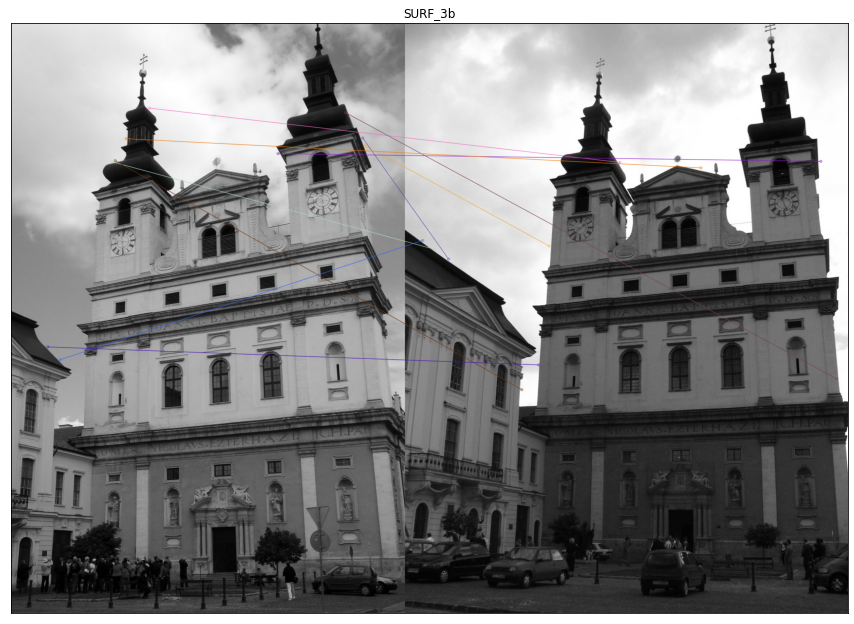

SIFT applied and Features Matched


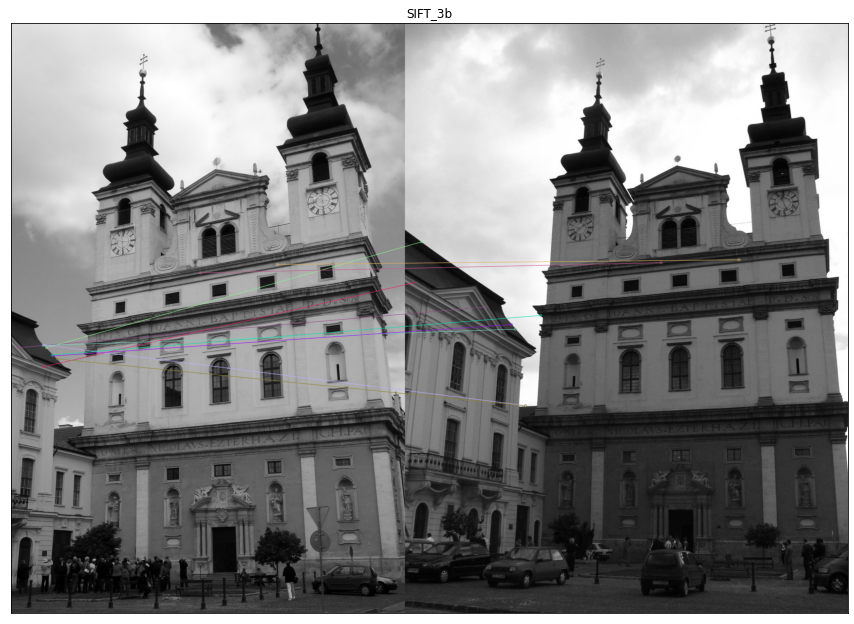

ORB applied and Features Matched


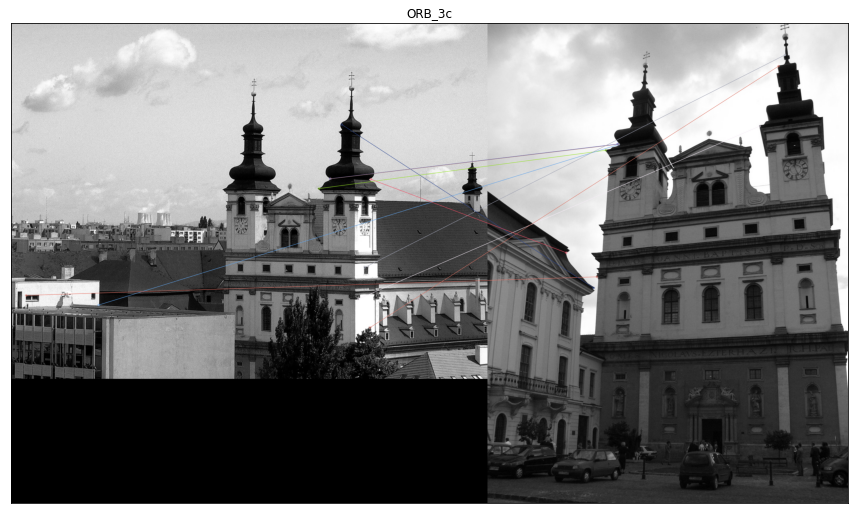

SURF applied and Features Matched


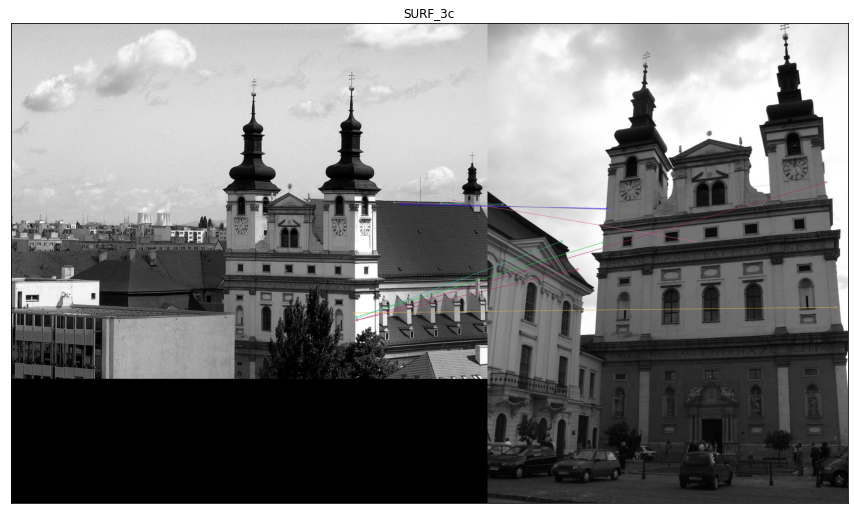

SIFT applied and Features Matched


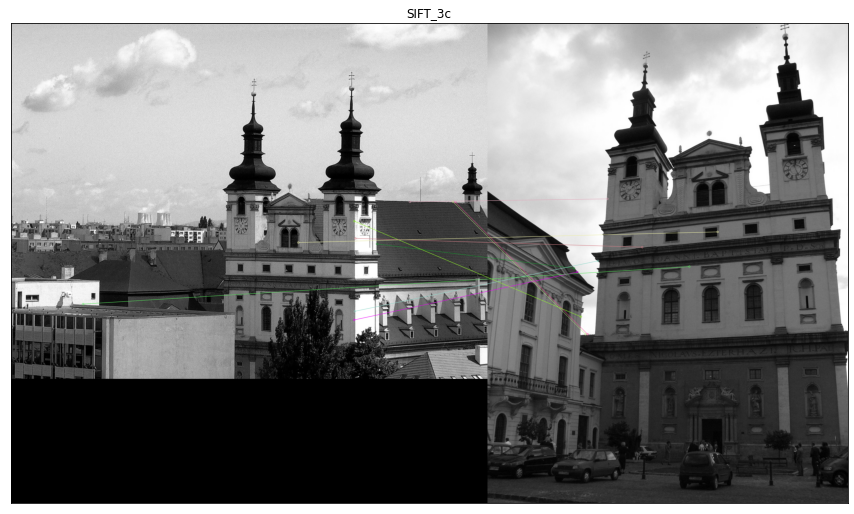

In [5]:
img1 = cv.imread(imgSet3[0],0)      # Set3_Image1
img2 = cv.imread(imgSet3[1],0)      # Set3_Image2
img3 = cv.imread(imgSet3[2],0)      # Set3_Image3

orb = computeORBnMatch(img1,img2,10)
compareImage(orb,"ORB_3a",15,30)

surf = computeSURFnMatch(img1,img2,10)
compareImage(surf,"SURF_3a",15,30)

sift = computeSIFTnMatch(img1,img2,10)
compareImage(sift,"SIFT_3a",15,30)

#------------------------------------------#

orb = computeORBnMatch(img1,img3,10)
compareImage(orb,"ORB_3b",15,30)

surf = computeSURFnMatch(img1,img3,10)
compareImage(surf,"SURF_3b",15,30)

sift = computeSIFTnMatch(img1,img3,10)
compareImage(sift,"SIFT_3b",15,30)

#------------------------------------------#

orb = computeORBnMatch(img2,img3,10)
compareImage(orb,"ORB_3c",15,30)

surf = computeSURFnMatch(img2,img3,10)
compareImage(surf,"SURF_3c",15,30)

sift = computeSIFTnMatch(img2,img3,10)
compareImage(sift,"SIFT_3c",15,30)

###Task2: Human Classification / Detection

In [ ]:
!ls "drive/My Drive"
# !rm -rf '/content/Test'

 Asg2Helper.py	        images			    Misc
'Colab Notebooks'       Images2			    MMC
 displayImage.py        INRIA_Dataset_Samples	    myConvolve2d.py
'Getting started.pdf'   INRIA_Dataset_Samples.zip   myHelperScript.py


In [ ]:
#Making a folder in Drive, to extract Dataset in it.
!mkdir "drive/My Drive/INRIA_Dataset_Samples" 

In [ ]:
# Unzipping INRIA Dataset .zip file into desired directory
!unzip -q "drive/My Drive/INRIA_Dataset_Samples.zip" -d "drive/My Drive/INRIA_Dataset_Samples"

In [9]:
#Loading Dataset

ftype = ".png"
imagesPosTrn = loadImage('drive/My Drive/INRIA_Dataset_Samples/Train/pos',ftype)
imagesNegTrn = loadImage('drive/My Drive/INRIA_Dataset_Samples/Train/neg',ftype)
imagesPosTst = loadImage('drive/My Drive/INRIA_Dataset_Samples/Test/pos',ftype)
imagesNegTst = loadImage('drive/My Drive/INRIA_Dataset_Samples/Test/neg',ftype)

print("Training Samples : " +  str(len(imagesPosTrn) + len(imagesNegTrn)), " | Positive:", len(imagesPosTrn), "| Negative:", len(imagesNegTrn))
print("Testing  Samples : " +  str(len(imagesPosTst) + len(imagesNegTst)), " | Positive:", len(imagesPosTst), "| Negative:", len(imagesNegTst))


Training Samples : 3328  | Positive: 2416 | Negative: 912
Testing  Samples : 1432  | Positive: 1132 | Negative: 300


In [12]:
global imgTrain
global lblTrain
imgTrain = []
lblTrain = []

imgTrain, lblTrain = DataPreprocessing(imagesPosTrn,imagesNegTrn,64,128,1,0)
print("Training Images processed successfully! \n")

global imgTest
global lblTest
imgTest = []
lblTest = []

imgTest, lblTest = DataPreprocessing(imagesPosTst,imagesNegTst,64,128,1,0)
print("Testing Images processed successfully!")


Training Images processed successfully! 




Testing Images processed successfully!


In [14]:
# imgTrain --> contains resized train images
# lblTrain --> contains labels of train images
# imgTest --> contains resized test images
# lblTest --> contains labels of test images

# hogTrain --> will contain vector histogram of train images
# hogTest --> will contain vector histogram of train images

global hogTrain #HOG Vectors for Training Images
global hogTest #HOG Vectors for Testing Images

hogTrain = []
hogImgTrain = []

# loop over the Processed Training images
for i in tqdm(range(0,len(imgTrain))):
  # Computing the HOG features for Training Dataset (Images)
  (h_vector, h_image) = compute_HOG(imgTrain[i])
  # append computed HOGs in hogTrain
  hogTrain.append(h_vector)
  hogImgTrain.append(h_image)
print("HOG computed for Training Images successfully! \n")

hogTest = []
hogImgTest = []

# loop over the Processed Testing images
for i in tqdm(range(0,len(imgTest))):
  # Computing the HOG features for Testing Dataset (Images)
  (h_vector, h_image) = compute_HOG(imgTest[i])
  # append computed HOGs in hogTest
  hogTest.append(h_vector)
  hogImgTest.append(h_image)
print("HOG computed for Testing Images successfully!")



HOG computed for Training Images successfully! 




HOG computed for Testing Images successfully!


In [15]:
# Training Linear SVC
clf1 = LinearSVC().fit(hogTrain, lblTrain)
print("SVC training completed")

# Saving Trained Model (Linear SVC)
filename1 = 'drive/My Drive/Linear_SVC.joblib'
joblib.dump(clf1, filename1)
print("Linear Support Vector Classifier Model saved! \n")

# Training RFC
clf2 = RandomForestClassifier().fit(hogTrain, lblTrain)
print("RFC training completed")

# Saving Trained Model (RFC)
filename2 = 'drive/My Drive/RFC.joblib'
joblib.dump(clf2, filename2)
print("Random Forest Classifier Model saved!")

SVC training completed
Linear Support Vector Classifier Model saved! 

RFC training completed
Random Forest Classifier Model saved!


In [16]:
# Loading Trained Linear SVC for Predicting Labels
svc = joblib.load(filename1)
lblPredictedSVC = svc.predict(hogTest)
print("Labels Predicted for Testing Dataset by Linear SVC \n")

print("Comparing predicted and actual labels (Linear SVC)")
print(lblPredictedSVC[1130:1140])
print(np.transpose(lblTest[1130:1140]),'\n')

# Loading Trained RFC for Predicting Labels
rfc = joblib.load(filename2)
lblPredictedRFC = rfc.predict(hogTest)
print("Labels Predicted for Testing Dataset by RFC \n")

print("Comparing predicted and actual labels (RFC)")
print(lblPredictedRFC[1130:1140])
print(np.transpose(lblTest[1130:1140]))

Labels Predicted for Testing Dataset by Linear SVC 

Comparing predicted and actual labels (Linear SVC)
[1 0 0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0] 

Labels Predicted for Testing Dataset by RFC 

Comparing predicted and actual labels (RFC)
[1 1 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0]


Confusion matrix:
Predicted    0     1   All
Actual                    
0          289    11   300
1           61  1071  1132
All        350  1082  1432

- Linear Support Vector Classifier - 
 

Confusion matrix:
Predicted    0     1   All
Actual                    
0          253    47   300
1           28  1104  1132
All        281  1151  1432

-- Random Forest Classifier -- 
 



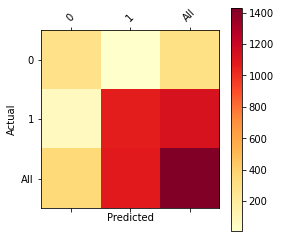

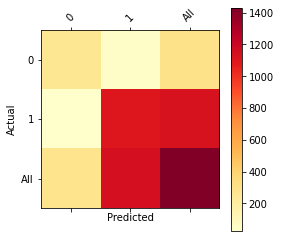

In [17]:
# Constructing Confusion Matrix of both Classifiers
cmSVC = constructConfusionMatrix(lblTest,lblPredictedSVC)
print("\n- Linear Support Vector Classifier - \n \n")
cmRFC = constructConfusionMatrix(lblTest,lblPredictedRFC)
print("\n-- Random Forest Classifier -- \n \n")

# Plotting Confusion Matrix of both Classifiers
plotConfusionMatrix(cmSVC)
plotConfusionMatrix(cmRFC)

In [18]:
#Computing Performance Metrics for both Classifiers

print("\n- Linear Support Vector Classifier -")
tprSVC, fprSVC, fsSVC, acSVC = computePerformanceMeasures(cmSVC,1)
print("\n-- Random Forest Classifier --")
tprRFC, fprRFC, fsRFC, acRFC = computePerformanceMeasures(cmRFC,1)

compareTwoClassifiers('Linear Support Vector Classifier', tprSVC, fprSVC, fsSVC, acSVC, 'Random Forest Classifier', tprRFC, fprRFC, fsRFC, acRFC)


- Linear Support Vector Classifier -
--------------------------------------------
True Negative:  289  | False Negative:  11
True Positive:  1071 | False Positive:  61
--------------------------------------------

-- Random Forest Classifier --
--------------------------------------------
True Negative:  253  | False Negative:  47
True Positive:  1104 | False Positive:  28
--------------------------------------------


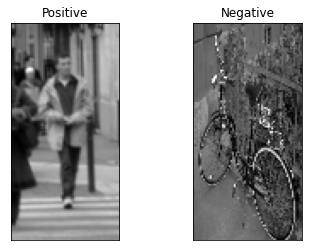

In [20]:
# Showing Correctly Detected Images (from both Classes)
# These images are from those which have been detected correctly by both Classifiers
displayTwoImages(imgTest[1130],imgTest[1140],"Positive","Negative")